# Regresion Lineal

- Relizar una regresion lineal con el dataset **Advertising.csv**
- la variable 'y' es la comuna 'Sales'
- Graficar y verificar dicha regresion y metrica (por ej R2)

1) Nuestro target es la columna 'Sales', cual de los tres productos de comunicacion posee mejor indice de correlacion lineal 


1.  TV
2.  Radio 
3.  Newspaper 

# Regresion Lineal Multiple

2) Si en lugar de tomar una sola variable tomamos las dos de mejor correlacion, el MSE Aumenta o disminuye?<br>
1. Aumenta
2. Dismuniye

# Feature engineer

Para estos ejercicios se utilizara el archivo **ML_Cars_dataset.csv**

**Descricion del dataset**

- aspiration : Aspiration used in a car
	std	Standard
	turbo	Turbo


- enginelocation : Location of the engine on the car
	front	Front
	rear	Rear

- carwidth : Width of the car

- curbweight : Weight of the car

- enginetype : Type of engine on the car

- cylindernumber : Number of cylinders on the car

- stroke : Stroke of the car

- peakrpm : Peak RPM of the car

- price : Whether the car is considered to be expensive or cheap

- Remover registros duplicados

- Ver Valores nulos

3) El porcentaje de valores faltantes  es mayor a 30%
1. Verdadero
2. Falso 

# Simple Imputer

- Imputar a los valores faltante del campo 'carwidth' con la mediana de toda la columna (explore bien esta columna)

4) Que estrategia utilizariamos en  SimpleImputer

1. 'mean'
2. 'median'
3. 'most_frequent'

 ## Detectando Outliers

Realizar lo mismo pero con la columna 'enginelocation'

# Escalado de valores

Aplique StandarScaler en las siguientes columnas:
peakrpm , carwidth , stroke y curbweight
con sus respectivas distribuciones

5) Al Aplicar StandardScaler sobre cualquier campo , cambia realmente sus distribución. <br>
1.Verdadero<br>
2.Falso

Visualice sudataset

6) Usamos Standard Scaler para...

1. que el modelo se ajuste mejor a los datos
2. no considerar los outliers
3. llegar a un score = 1

# Feature encoding

Ahora nos dedicaremos a las variables categoricas, que son:

aspiration , enginelocation, enginetype y cylindernumber


- Realizar un OneHotEncoder sobre la columna 'aspiration y enginelocation' para obtener valores binarios

- Realizar un OneHotEncoder sobre la columna 'enginetype'

- Realizar un cambio del tipo de valor a la columna cylindernumber seguido de un MinMaxScaler

- Realizar un labelencoder a la columna **Price** 

- Visualice el tamaño del dataset

7) Cuantas columnas quedaron en el dataset

1. 9
2. 6
2. 15 

# Correlacion de columnas

8)Metimos valores binarios a la columna **Price**, ahora queremos realizar una clasificación tomando esta última como variable objetivo.
<br>Ves variables que estén minimamente correlacionada y sea conveniente quitar una de las dos? Cuáles?<br>
1.carwidth	y curbweight<br>
2.ohcv y enginelocation<br>
3.dohcv	 y l<br>

- Elimina la variable que consideres adecuada

# Clasificacion

- Realizar un modelo de Regresion logistica junto con una validacion cruzada
- De dicha validacion determine el score promedio (utilizamos el score por default)

9) En qué rango se encuentra el accuracy del modelo?
1. [0.7 , 0.75]
2. [0.55 , 0.65]
3. [0.85 , 0.9] 
4. [0.95 , 1.0]

# Metricas

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]



10) Si nos enfocamos en la clase  de los **1** ¿Cual es el valor de la Exhaustividad (Recall)?

- 1. 0.5
- 2. 0.75
- 3. 0.8
- 4. 0.95

# Ajustando Metricas

In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # actual truths
preds = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # predictions



11) Si nos enfocamos en la clase  de los **1** ¿Cuál es la cantidad de verdaderos positivos?<br>
1.4<br>
2.3<br>
3.2<br>
4.1<br>

## Ajuste de metricas

Tomando en cuenta un umbral (threshold) de 0.5 tenemos el siguiente comportamiento

<image src="imagenes/tr_0.5.png">
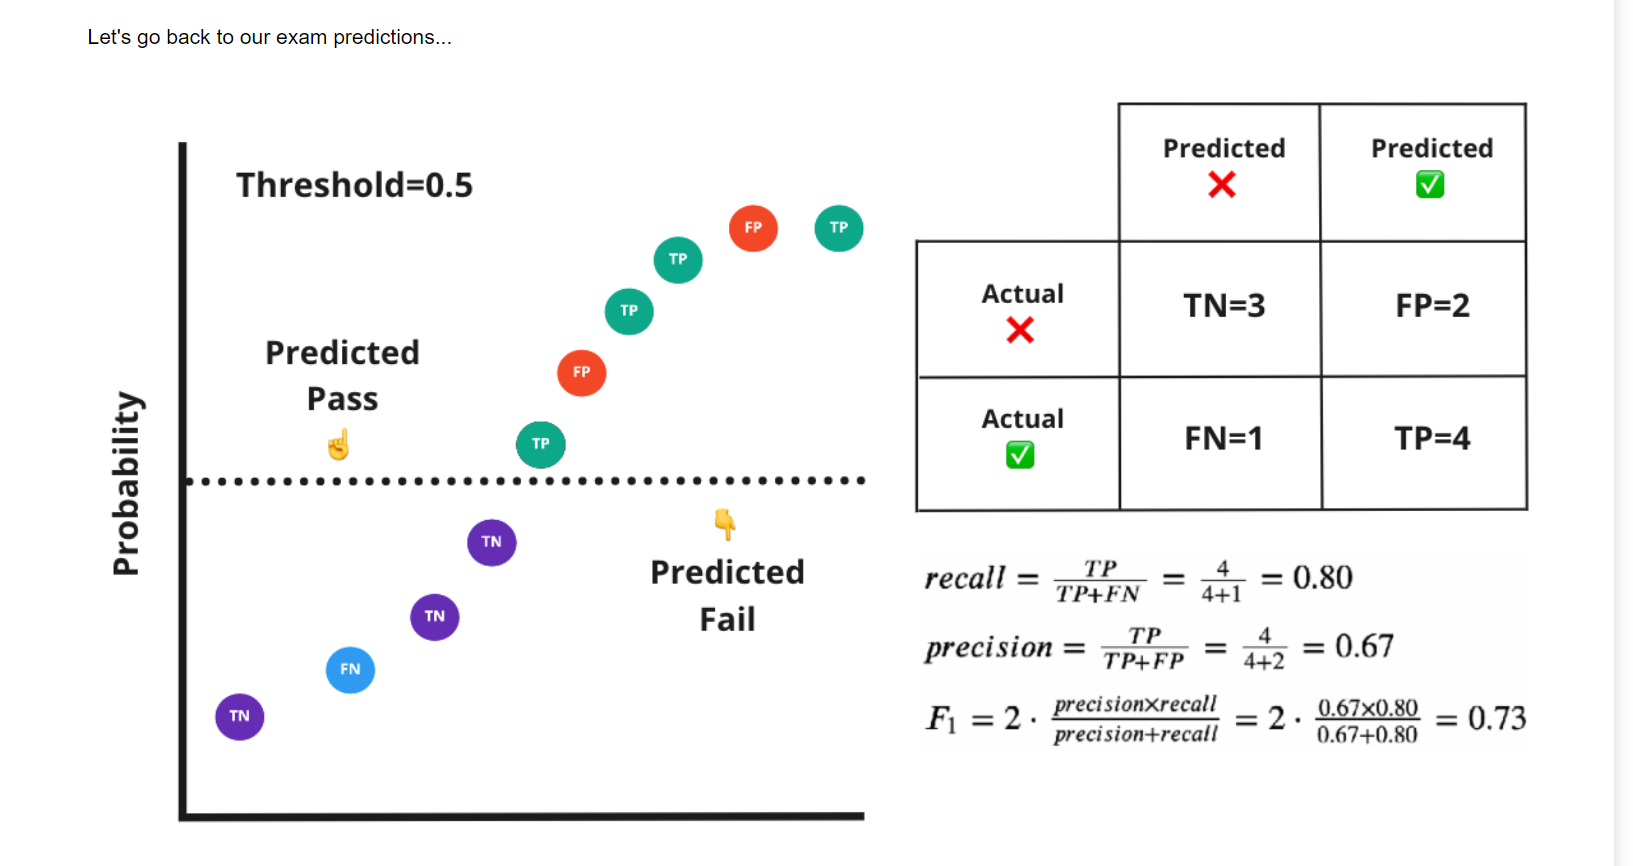

- Ahora bien, tomemos la condicion de un umbral (threshold) es 0.2. Junto con su matriz de confusion.

<image src="imagenes/tr_02.png">

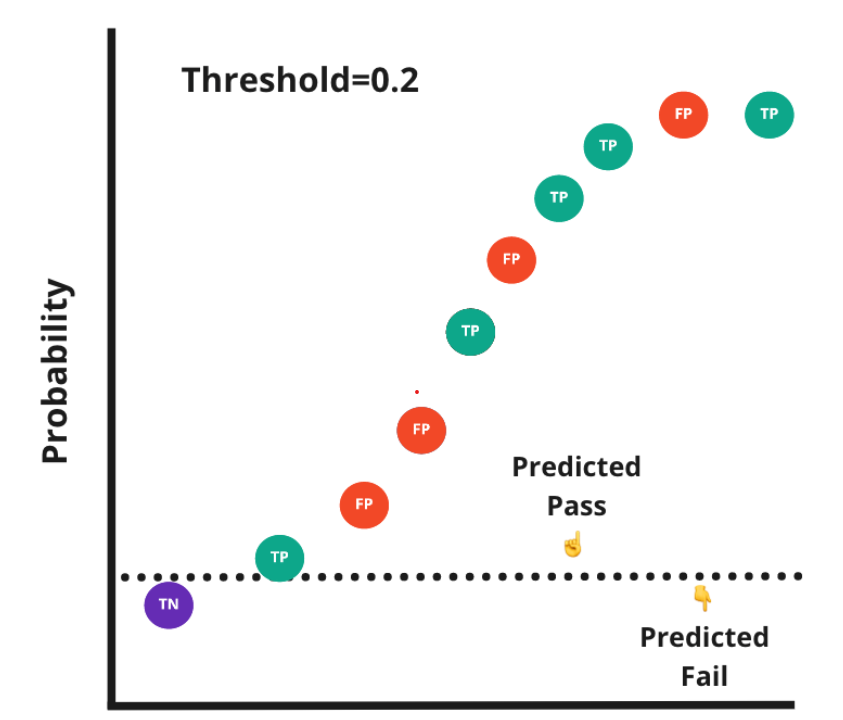

<image src="imagenes/matriz_tr02.png">
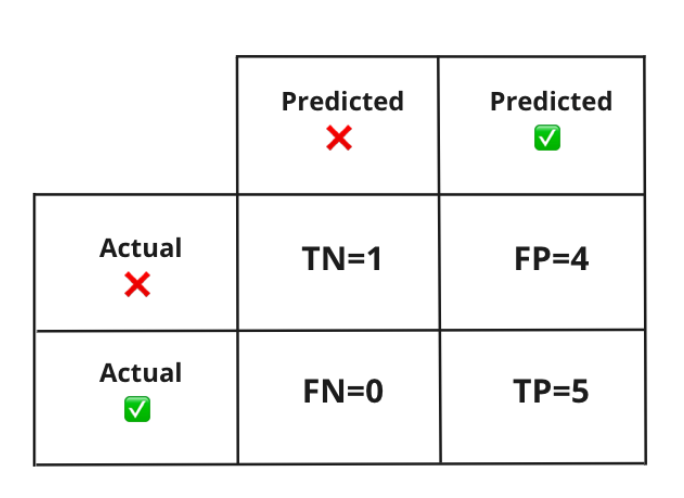

12) La presición aumento?
1. Verdadero
2. Falso

- Ahora tomemos la condicion en el cual nuestro umbral (threshold) es de 0.75. Junto con su matriz de confusion

<image src="imagenes/tr075.png">
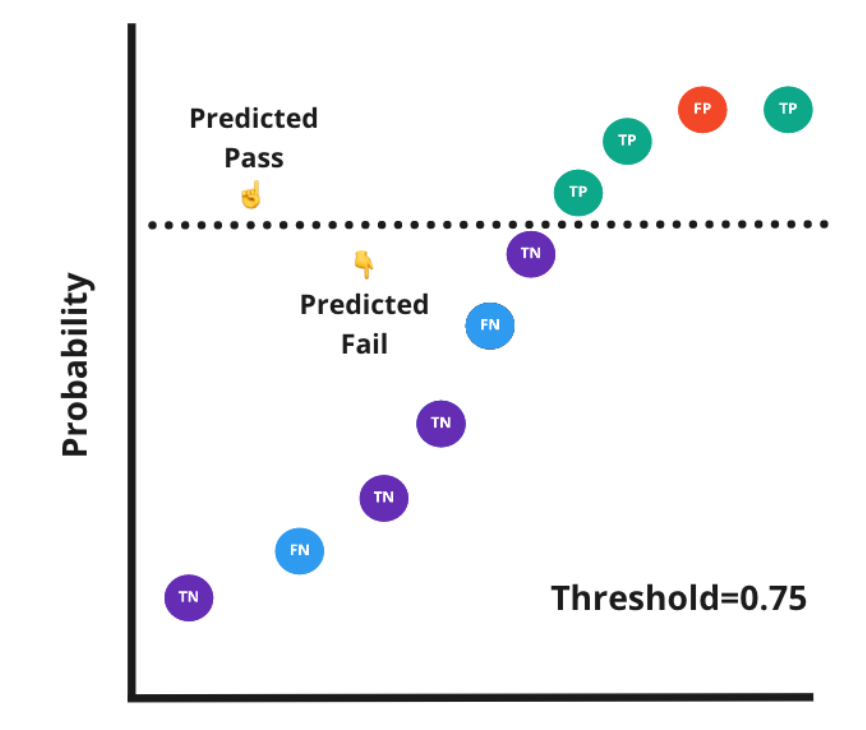

<img src='imagenes/matriztr075.png'>

13) La exhaustividad (recall) aumento?
1. Verdarero 
2. Falso

# KNN

- Segun los datos a unilizar determine el mejor numero de vecinos para realizar la regresion

In [39]:
df2 = pd.read_csv("./datasets/ML_Houses_clean.csv")

In [47]:
df2.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

knn_model = KNeighborsRegressor()

X1 = df2.drop(columns = ['SalePrice'])
y1 = df2.SalePrice

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X1_rescaled = scaler.fit_transform(X1)

cv_results = cross_validate(knn_model, X1_rescaled, y1, cv=5)

In [57]:
rescaled_score = cv_results['test_score'].mean()
rescaled_score

0.649019431450802

14) Realiza una lista de score para cada valor de k entre 1 y 24 y plotear el resultado.<br>
El mejor valor de K es<br>
1.3<br>
2.11<br>
3.20<br>

# K-means

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [62]:
random_state=42
X, y = make_blobs(n_samples=500, centers=4, random_state=random_state)

15) Teniendo en cuenta la metrica de la distancia media al centroide.<br>
    Cual seria el valor optimo de K?

1. 1<br>
2. 2<br>
3. 10<br>
4. 4

# SVM + GridShearch

In [70]:

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

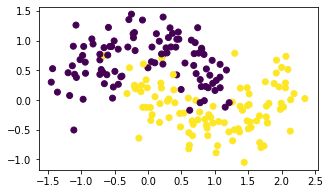

In [71]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

In [4]:


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy import stats


# Hyperparameter search space
search_space = {
    'kernel': ['sigmoid', 'rbf'],
    'C': [0.01, 0.1, 1,10,100,1000],
    'gamma': [0,0.1,1,10,100],
    'coef0': [0,0.1,1],
}



16) Según GridSearch, cuáles son los mejores hiperparámetros considerando tomar 3 fold en la validación cruzada:<br>
1. {'C': 0.01, 'coef0': 0, 'gamma': 1, 'kernel': 'sigmoid'}<br>
2. {'C': 1, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}<br>
3. {'C': 1, 'coef0': 0, 'gamma': 1, 'kernel': 'sigmoid'}<br>
4. {'C': 0.1, 'coef0': 0, 'gamma': 1, 'kernel': 'rbf'}<br>

# Descenso de Gradiente

17) Cual es el objetivo concreto del algoritmo de descenso de gradiente

- 1. Ajustar la recta de regresion 
- 2. Buscar un mínimo global mediante iteraciones en las cuales se va descendiendo en la función de costo
- 3. Obtener mejor score

# Deep Learning

18) Donde son mas utilizadas las redes neuronales convolucionales (CNN)

- 1. En series temporales
- 2. En procesamiento de lenguaje natural
- 3. En procesamiento de imagenes

# Pipelines

19) Realizar un pipeline con las siguientes caracteristicas:

- utilizar el dataset **data.csv**, en el el cual el y es la columna "target_5y"
- realizar un los siguientes **pipelines**:
        - uno de preprocesamiento usando **MinMaxScales** y un **SimpleImputer** con estrategia promedio para los nulos
        - Despues integrarlo todo con un pipeline en el cual este el modelo SVC
        - Acto seguido realizar un **RandomizedSearchCV** con los siguientes atributos:
                    -'preprocessing__imputer__strategy': ['mean', 'median','most_frequent'],
                     'model_svm__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                     'model_svm__C': uniform(0.1,10)},
                      cv=5,
                      n_iter = 50,
                      scoring="precision"
                      
     - A este modelo lo llamaran yunned_pipe
     - realizan un .fit() con el tunned_pipe 
     
- Por ultimo relizamos una validacion cruzada con un maximo de cv = 5 un  scoring tipo "precision"

Cuanto es el resultado del score?

- 1. [0.4-0.6]
- 2. [0.9-1.0]
- 3. [0.7-0.8] 

# Modelo ensamblado

20) Cual de estos modelos de ensamble, no tienen un entrenamiento paralelizable

- 1. Bagging
- 2. Random Forest
- 3. Boosting